In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pickle

In [2]:
import rpy2
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

from rpy2.robjects.packages import importr, data


utils = importr('utils')
base = importr('base')
%load_ext rpy2.ipython

In [3]:
def to_rdf(df):
    with (robjects.default_converter + pandas2ri.converter).context():
        rdf = robjects.conversion.get_conversion().py2rpy(df)
    return rdf

def to_df(rdf):
    with (robjects.default_converter + pandas2ri.converter).context():
        df = robjects.conversion.get_conversion().rpy2py(rdf)

    return df
summary = rpy2.robjects.r['summary']
coef = rpy2.robjects.r['coef']
rprint = rpy2.robjects.r['print']
plot = rpy2.robjects.r['plot']



In [4]:
%%R
R.version.string

[1] "R version 4.3.1 (2023-06-16)"


In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages


## Instalar pacotes do R localmente (só para seu usuário)
Talvez é necessário usar
```
utils.install_packages('mirt')
utils.install_packages('mirtCAT')

```
e o equivalente de outros pacotes. Deu erro instalar devtools desta forma, mas consegui instalar no rstudio.atp.usp.br. agora a linha abaixo funciona:

In [5]:
#devtools.install_github('alexandrejaloto/microEnem')

In [6]:
utils.install_packages('mirt')
utils.install_packages('mirtCAT')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Warning in (function (pkgs, lib, repos = getOption("repos"), contriburl = contrib.url(repos,  :
R[write to console]: 
 
R[write to console]:  'lib = "/usr/local/lib/R/site-library"' is not writable



Would you like to use a personal library instead? (yes/No/cancel)  yes
Would you like to create a personal library
‘/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3’
to install packages into? (yes/No/cancel)  yes


R[write to console]: also installing the dependencies ‘permute’, ‘GPArotation’, ‘gridExtra’, ‘vegan’, ‘Deriv’, ‘pbapply’, ‘dcurver’, ‘RcppArmadillo’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/permute_0.9-7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 114805 bytes (112 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C++... yes
checking whether g++ -std=gnu++14 accepts -g... yes
checking for g++ -std=gnu++14 option to enable C++11 features... none needed
checking how to run the C++ preprocessor... g++ -std=gnu++14 -E
checking whether the compiler supports GNU C++... (cached) yes
checking whether g++ -std=gnu++14 accepts -g... (cached) yes
checking for g++ -std=gnu++14 option to enable C++11 features... (cached) none needed
checking whether we have a suitable tempdir... /tmp
checking whether R CMD SHLIB can already compile programs using OpenMP... yes
checking LAPACK_LIBS... system LAPACK found
configure: creating ./config.status
config.status: creating inst/include/RcppArmadillo/config/RcppArmadilloConfigGenerated.h
config.stat

** libs
using C++ compiler: ‘g++ (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include -I'/usr/local/lib/R/site-library/Rcpp/include'    -fopenmp -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include -I'/usr/local/lib/R/site-library/Rcpp/include'    -fopenmp -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c fastLm.cpp -o fastLm.o
g++ -std=gnu++14 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o RcppArmadillo.so RcppArmadillo.o RcppExports.o fastLm.o -fopenmp -llapack -lblas -lgfortran -lm -lquadmath -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-RcppArmadillo/00new/RcppArmadillo/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (RcppArmadillo)
* installing *source* package ‘vegan’ ...
** package ‘vegan’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’
using Fortran compiler: ‘GNU Fortran (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c data2hill.c -o data2hill.o
gfortran  -fpic  -g -O2 -fstack-protector-strong  -c decorana.f -o decorana.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c getF.c -o getF.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c goffactor.c -o goffactor.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gfortran  -fpic  -g -O2 -fstack-protector-strong  -c monoMDS.f -o monoMDS.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-vegan/00new/vegan/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (vegan)
* installing *source* package ‘dcurver’ ...
** package ‘dcurver’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘g++ (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’
using C++11


g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'    -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'    -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c dcUtils.cpp -o dcUtils.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'    -fopenmp  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c distFuncs.cpp -o distFuncs.o
g++ -std=gnu++11 -I

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-dcurver/00new/dcurver/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (dcurver)
* installing *source* package ‘mirt’ ...
** package ‘mirt’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘g++ (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'    -fopenmp -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c Estep.cpp -o Estep.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'    -fopenmp -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c Misc.cpp -o Misc.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'    -fopenmp -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c dpars.cpp -o dpars.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEB

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-mirt/00new/mirt/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading


Creating a new generic function for ‘Deriv’ in package ‘mirt’


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (mirt)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/Rtmp2WMD6G/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Installing package into ‘/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘fs’, ‘rappdirs’, ‘Rcpp’, ‘base64enc’, ‘jquerylib’, ‘memoise’, ‘sass’, ‘httpuv’, ‘mime’, ‘jsonlite’, ‘xtable’, ‘fontawesome’, ‘htmltools’, ‘sourcetools’, ‘later’, ‘promises’, ‘rlang’, ‘fastmap’, ‘commonmark’, ‘bslib’, ‘cachem’, ‘xfun’, ‘shiny’, ‘mar

g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.cc -o init.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c id.cc -o id.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c file.cc -o file.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c path.cc -o path.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread      -fpic  -g -O2 -fstack-protecto

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-fs/00new/fs/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fs)
* installing *source* package ‘rappdirs’ ...
** package ‘rappdirs’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c win-path.c -o win-path.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o rappdirs.so init.o win-path.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-rappdirs/00new/rappdirs/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (rappdirs)
* installing *source* package ‘Rcpp’ ...
** package ‘Rcpp’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘g++ (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c api.cpp -o api.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c attributes.cpp -o attributes.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c barrier.cpp -o barrier.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c date.cpp -o date.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include/      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-Rcpp/00new/Rcpp/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (Rcpp)
* installing *source* package ‘base64enc’ ...
** package ‘base64enc’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c base64.c -o base64.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c uriencode.c -o uriencode.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c utf8.c -o utf8.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o base64enc.so base64.o uriencode.o utf8.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-base64enc/00new/base64enc/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (base64enc)
* installing *source* package ‘mime’ ...
** package ‘mime’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c rawmatch.c -o rawmatch.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o mime.so init.o rawmatch.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-mime/00new/mime/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (mime)
* installing *source* package ‘jsonlite’ ...
** package ‘jsonlite’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api     -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c base64.c -o base64.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api     -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c collapse_array.c -o collapse_array.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api     -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c collapse_object.c -o collapse_object.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api     -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c collapse_pretty.c -o collapse_pretty.o
gcc -I"/usr/share/R/include" -DNDEBUG -Iyajl/api     -fvisibility=hidden  -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-jsonlite/00new/jsonlite/libs
** R
** inst
** byte-compile and prepare package for lazy loading


in method for ‘asJSON’ with signature ‘"AsIs"’: no definition for class “AsIs”
in method for ‘asJSON’ with signature ‘"ITime"’: no definition for class “ITime”
in method for ‘asJSON’ with signature ‘"hms"’: no definition for class “hms”
in method for ‘asJSON’ with signature ‘"json"’: no definition for class “json”
in method for ‘asJSON’ with signature ‘"integer64"’: no definition for class “integer64”
in method for ‘asJSON’ with signature ‘"pairlist"’: no definition for class “pairlist”
in method for ‘asJSON’ with signature ‘"blob"’: no definition for class “blob”
in method for ‘asJSON’ with signature ‘"scalar"’: no definition for class “scalar”
in method for ‘asJSON’ with signature ‘"sf"’: no definition for class “sf”
in method for ‘asJSON’ with signature ‘"sfc"’: no definition for class “sfc”
in method for ‘asJSON’ with signature ‘"vctrs_vctr"’: no definition for class “vctrs_vctr”


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (jsonlite)
* installing *source* package ‘xtable’ ...
** package ‘xtable’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (xtable)
* installing *source* package ‘sourcetools’ ...
** package ‘sourcetools’ successfully 

g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c Reader.cpp -o Reader.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I../inst/include      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c Tokenizer.cpp -o Tokenizer.o
gcc -I"/usr/share/R/include" -DNDEBUG -I../inst/include      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c sourcetools-init.c -o sourcetools-init.o
g++ -std=gnu++14 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o sourcetools.so Reader.o Tokenizer.o sourcetools-init.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-sourcetools/00new/sourcetools/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sourcetools)
* installing *source* package ‘rlang’ ...
** package ‘rlang’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG -I./rlang/     -fvisibility=hidden -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c capture.c -o capture.o
gcc -I"/usr/share/R/include" -DNDEBUG -I./rlang/     -fvisibility=hidden -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c internal.c -o internal.o
gcc -I"/usr/share/R/include" -DNDEBUG -I./rlang/     -fvisibility=hidden -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c rlang.c -o rlang.o
gcc -I"/usr/share/R/include" -DNDEBUG -I./rlang/     -fvisibility=hidden -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c version.c -o version.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o rlang.so capture.o internal.o rlang.o version.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-rlang/00new/rlang/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (rlang)
* installing *source* package ‘fastmap’ ...
** package ‘fastmap’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’
using C++ compiler: ‘g++ (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -Ilib/     -DR_NO_REMAP -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c fastmap.cpp -o fastmap.o
gcc -I"/usr/share/R/include" -DNDEBUG -Ilib/      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
g++ -std=gnu++14 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o fastmap.so fastmap.o init.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-fastmap/00new/fastmap/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fastmap)
* installing *source* package ‘commonmark’ ...
** package ‘commonmark’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


rm -f cmark/cmark.o cmark/node.o cmark/iterator.o cmark/blocks.o cmark/inlines.o cmark/scanners.o cmark/utf8.o cmark/buffer.o cmark/references.o cmark/render.o cmark/man.o cmark/xml.o cmark/html.o cmark/commonmark.o cmark/latex.o cmark/houdini_href_e.o cmark/houdini_html_e.o cmark/houdini_html_u.o cmark/cmark_ctype.o cmark/arena.o cmark/linked_list.o cmark/plugin.o cmark/registry.o cmark/syntax_extension.o cmark/plaintext.o cmark/footnotes.o cmark/map.o extensions/autolink.o extensions/core-extensions.o extensions/ext_scanners.o extensions/strikethrough.o extensions/table.o extensions/tagfilter.o extensions/tasklist.o extensions.o init.o wrapper.o commonmark.so cmark/libstatcmark.a
gcc -I"/usr/share/R/include" -DNDEBUG -Icmark -I. -DCMARK_GFM_STATIC_DEFINE -DCMARK_GFM_EXTENSIONS_STATIC_DEFINE -DR_NO_REMAP -DSTRICT_R_HEADERS     -fvisibility=hidden -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c extensions.c -o extensions.o
gcc

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-commonmark/00new/commonmark/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (commonmark)
* installing *source* package ‘xfun’ ...
** package ‘xfun’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c base64.c -o base64.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o xfun.so base64.o init.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-xfun/00new/xfun/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (xfun)
* installing *source* package ‘lpSolve’ ...
** package ‘lpSolve’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG -I . -DINTEGERTIME -DPARSER_LP -DBUILDING_FOR_R -DYY_NEVER_INTERACTIVE -DUSRDLL -DCLOCKTIME -DRoleIsExternalInvEngine -DINVERSE_ACTIVE=INVERSE_LUSOL -DINLINE=static -DParanoia      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c colamd.c -o colamd.o
gcc -I"/usr/share/R/include" -DNDEBUG -I . -DINTEGERTIME -DPARSER_LP -DBUILDING_FOR_R -DYY_NEVER_INTERACTIVE -DUSRDLL -DCLOCKTIME -DRoleIsExternalInvEngine -DINVERSE_ACTIVE=INVERSE_LUSOL -DINLINE=static -DParanoia      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c commonlib.c -o commonlib.o
gcc -I"/usr/share/R/include" -DNDEBUG -I . -DINTEGERTIME -DPARSER_LP -DBUILDING_FOR_R -DYY_NEVER_INTERACTIVE -DUSRDLL -DCLOCKTIME -DRoleIsExternalInvEngine -DINVERSE_ACTIVE=INVERSE_LUSOL -DINLINE=static -DParanoia      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-lpSolve/00new/lpSolve/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lpSolve)
* installing *source* package ‘htmltools’ ...
** package ‘htmltools’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c template.c -o template.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o htmltools.so init.o template.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-htmltools/00new/htmltools/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (htmltools)
* installing *source* package ‘later’ ...
** package ‘later’ successfully unpacked and MD5 sums checked
** using staged installation


Running configure script
-latomic linker flag not needed.
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -pthread -DSTRICT_R_HEADERS  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o


** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’
using C++ compiler: ‘g++ (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -pthread -DSTRICT_R_HEADERS  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c callback_registry.cpp -o callback_registry.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -pthread -DSTRICT_R_HEADERS  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c debug.cpp -o debug.o
gcc -I"/usr/share/R/include" -DNDEBUG -pthread -DSTRICT_R_HEADERS  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -pthread -DSTRICT_R_HEADERS  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-later/00new/later/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (later)
* installing *source* package ‘cachem’ ...
** package ‘cachem’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c cache.c -o cache.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o cachem.so cache.o init.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-cachem/00new/cachem/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (cachem)
* installing *source* package ‘markdown’ ...
** package ‘markdown’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temp

gcc -I"/usr/share/R/include" -DNDEBUG -I./libsass/include      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c compile.c -o compile.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -I./libsass/include      -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.cpp -o init.o
MAKEFLAGS= CC="gcc" CFLAGS="-g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 " CXX="g++ -std=gnu++14" AR="ar" LDFLAGS="-Wl,-Bsymbolic-functions -Wl,-z,relro" make -C libsass
make[1]: Entering directory '/tmp/RtmphzaQbB/R.INSTALLc9aa63527f86/sass/src/libsass'
gcc -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -O2 -I ./include  -fPIC -c -o src/cencode.o src/cencode.c
g++ -std=gnu++14 -Wall -O2 -std=c++11 -I ./include  -fPIC -c -o src/ast.o src/ast.cpp
g++ -std=gnu++14 -Wall -O2 -std=c++11 -I ./include

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-sass/00new/sass/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sass)
* installing *source* package ‘fontawesome’ ...
** package ‘fontawesome’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** tes

g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/later/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/later/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c promise_task.cpp -o promise_task.o
g++ -std=gnu++14 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o promises.so RcppExports.o promise_task.o -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-promises/00new/promises/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (promises)
* installing *source* package ‘httpuv’ ...
** package ‘httpuv’ successfully unpacked and MD5 sums checked
** using staged installation


** Using bundled copy of libuv
** PKG_CFLAGS=-Ilibuv/include
** PKG_LIBS=./libuv/.libs/libuv.a
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/later/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'    -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o


** libs
using C compiler: ‘gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’
using C++ compiler: ‘g++ (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609’


g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/later/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'    -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c callback.cpp -o callback.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/later/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include'    -fvisibility=hidden -DSTRICT_R_HEADERS -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c callbackqueue.cpp -o callbackqueue.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG -Ilibuv/include -pthread -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/later/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/

aclocal.m4:17: warning: this file was generated for autoconf 2.71.
You have another version of autoconf.  It may work, but is not guaranteed to.
If you have problems, you may need to regenerate the build system entirely.
To do so, use the procedure documented by the package, typically 'autoreconf'.
+ libtoolize --copy
/opt/miniconda3/bin/libtoolize: 1: /opt/miniconda3/bin/libtoolize: /usr/bin/grep: not found
libtoolize: warning: no serial number on '/opt/miniconda3/share/aclocal/libtool.m4', not copying.


libtoolize: putting auxiliary files in '.'.
libtoolize: copying file './ltmain.sh'
libtoolize: putting macros in 'm4'.
libtoolize: copying file 'm4/libtool.m4'
libtoolize: copying file 'm4/ltversion.m4'


+ aclocal -I m4
+ autoconf
+ automake --add-missing --copy


make --directory=libuv \
	HAVE_DTRACE=0
make[1]: Entering directory '/tmp/RtmpXk0o2u/R.INSTALLcc3e3f20c96c/httpuv/src/libuv'
  CC       src/libuv_la-fs-poll.lo
  CC       src/libuv_la-idna.lo
  CC       src/libuv_la-inet.lo
  CC       src/libuv_la-random.lo
  CC       src/libuv_la-strscpy.lo
  CC       src/libuv_la-threadpool.lo
  CC       src/libuv_la-timer.lo
  CC       src/libuv_la-uv-data-getter-setters.lo
  CC       src/libuv_la-uv-common.lo
  CC       src/libuv_la-version.lo
  CC       src/unix/libuv_la-async.lo
  CC       src/unix/libuv_la-core.lo
  CC       src/unix/libuv_la-dl.lo
  CC       src/unix/libuv_la-fs.lo
  CC       src/unix/libuv_la-getaddrinfo.lo
  CC       src/unix/libuv_la-getnameinfo.lo
  CC       src/unix/libuv_la-loop-watcher.lo
  CC       src/unix/libuv_la-loop.lo
  CC       src/unix/libuv_la-pipe.lo
  CC       src/unix/libuv_la-poll.lo
  CC       src/unix/libuv_la-process.lo
  CC       src/unix/libuv_la-random-devurandom.lo
  CC       src/unix/libuv_la-signal

installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-httpuv/00new/httpuv/libs
** R
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (httpuv)
* installing *source* package ‘bslib’ ...
** package ‘bslib’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record o

g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c CAT_functions.cpp -o CAT_functions.o
g++ -std=gnu++14 -I"/usr/share/R/include" -DNDEBUG  -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/Rcpp/include' -I'/dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/RcppArmadillo/include'     -fpic  -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c item_functions.cpp -o item_functions.o
g++ -std=gnu++14 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o mirtCAT.so CAT_functions.o item_functions.o -llapack -lblas -lgfortran -lm -lquadmath -L/usr/lib/R/lib -lR


installing to /dados1/home/luis/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-mirtCAT/00new/mirtCAT/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (mirtCAT)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/Rtmp2WMD6G/downloaded_packages’
R[write to console]: 
R[write to console]: 



<rpy2.rinterface_lib.sexp.NULLType object at 0x7fe2f6999d80> [RTYPES.NILSXP]

In [14]:
mirt = importr('mirt')
mirtcat = importr("mirtCAT")

In [15]:
ano = 2019
item_info = pd.read_csv(f'../inep/enem/{ano}/DADOS/ITENS_PROVA_{ano}-utf8.csv',sep='\;',engine='python')
item_info.value_counts('TX_MOTIVO_ABAN')


TX_MOTIVO_ABAN
Não permitiu a convergência do algoritmo de estimação da TRI    38
Name: count, dtype: int64

In [16]:
item_info.query('IN_ITEM_ABAN == 1')

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
219,15,LC,118260,E,15,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Branca,514,NaN,0
371,29,LC,118260,E,15,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Amarela,512,NaN,0
372,29,LC,118260,E,15,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Laranja,521,NaN,0
373,29,LC,118260,E,15,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Verde,525,NaN,1
416,33,LC,118260,E,15,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Azul,511,NaN,0
450,36,LC,118260,E,15,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Rosa,513,NaN,0
582,48,CH,118067,C,29,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Azul,507,NaN,0
770,66,CH,76955,B,27,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Branca,509,NaN,0
813,69,CH,118067,C,29,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Branca,509,NaN,0
841,72,CH,76955,B,27,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Rosa,510,NaN,0


In [17]:
def load_acertos(ano,area,perc=1,sample=None,remove_abandonados=True):
    '''Retorna os acertos original (da amostra de x %) com os itens mais colunos com as notas_inep e caderno.
     Também retorna e um com somente itens.
    
    Se usar sample, retornar somente sample linhas. Deve dar erro se sample > número de linhas na amostra'''
    df = pd.read_csv(f'data/ac_{perc}_{ano}_{area}.csv',index_col='candidato')
    if sample:
        df = df.sample(sample)
    resp = df.iloc[:,:-3] # assume que as últimas 3 colunas são acertos, nota_inep e caderno 
    if remove_abandonados:
        removed_columns = [col for col in resp.columns if col.endswith('-aban')]
        resp = resp.drop(columns=removed_columns)

    item_info = pd.read_csv(f'../inep/enem/{ano}/DADOS/ITENS_PROVA_{ano}-utf8.csv',sep='\;',engine='python')
    item_info.dropna(subset='CO_ITEM',inplace=True)
    item_info['CO_ITEM'] = item_info['CO_ITEM'].astype(int)
    item_info = item_info[item_info['SG_AREA'] == area]
    item_info = item_info.drop_duplicates(subset='CO_ITEM')
    return df,resp,item_info

df,resp,item_info = load_acertos(2009,'CN',sample=10000,remove_abandonados=False)
resp

,60083,60084,60085,60086,60087,60088,60089,60090,59286,60091,...,60145,60146,60147,58396,59311,60148,60149,60150,60151,60152
candidato,,,,,,,,,,,,,,,,,,,,,
100001070944,0,0,0,1,1,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
100003053398,1,0,0,1,1,1,1,0,0,0,...,0,1,0,0,1,1,1,0,0,0
100003881375,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
100000310757,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
100000762755,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100001260552,1,0,1,0,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
100001352617,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
100000483925,1,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [18]:
def rename_aban(itemname):
    return itemname.strip('-aban')

def item_stats(ano,area):
    acertos, resp, item_info = load_acertos(ano, area, sample=10000,remove_abandonados=False)
    resp.rename(columns=rename_aban,inplace=True)
    istats = mirt.itemstats(to_rdf(resp))
    istats = to_df(istats[1])
    #istats.index = istats.index.astype(int)
    #istats.index = istats.index
    item_info = item_info.drop_duplicates(subset=['CO_ITEM'],keep='first')
    item_info = item_info.set_index('CO_ITEM')
    item_info.index = item_info.index.astype(str)
    istats = pd.merge(istats,item_info,how='left',left_index=True,right_index=True,validate='1:m')
    istats = istats.drop(columns=['CO_HABILIDADE'])
    return istats
istats = item_stats(2019,'CN')
istats.sort_values('total.r',ascending=True)

,N,mean,sd,total.r,total.r_if_rm,alpha_if_rm,CO_POSICAO,SG_AREA,TX_GABARITO,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
14273,10000,0.0923,0.289463,0.010440,-0.048881,0.652510,106,CN,D,0,NaN,3.90297,2.19782,0.05798,Amarela,504,NaN,0
97169,10000,0.1278,0.333884,0.040291,-0.028210,0.652548,107,CN,A,0,NaN,5.93339,1.98881,0.13188,Amarela,504,NaN,0
111601,10000,0.2264,0.418522,0.067542,-0.018347,0.654036,91,CN,B,0,NaN,7.09582,2.42384,0.23686,Amarela,504,NaN,0
54381,10000,0.1133,0.316975,0.071511,0.006507,0.650491,96,CN,A,0,NaN,3.20714,2.14905,0.08067,Rosa,506,NaN,0
83441,10000,0.1300,0.336320,0.079520,0.010564,0.650610,106,CN,D,0,NaN,4.60881,1.94111,0.12462,Azul,503,NaN,0
83609,10000,0.3086,0.461939,0.086877,-0.007909,0.654482,98,CN,E,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Amarela,504,NaN,0
78504,10000,0.1960,0.396988,0.112653,0.031404,0.650473,108,CN,C,0,NaN,3.20779,1.67408,0.16383,Azul,503,NaN,0
49600,10000,0.1714,0.376877,0.116605,0.039537,0.649668,108,CN,D,0,NaN,1.14904,2.36402,0.11480,Amarela,504,NaN,0
117868,10000,0.4955,0.500005,0.121435,0.019008,0.653498,114,CN,E,0,NaN,0.05808,8.96186,0.22071,Amarela,504,NaN,0
89515,10000,0.3195,0.466306,0.140687,0.045440,0.650801,113,CN,C,0,NaN,3.14647,1.67856,0.32644,Amarela,504,NaN,0


In [25]:
istats.sort_values(by=['TX_MOTIVO_ABAN'])

,N,mean,sd,total.r,total.r_if_rm,alpha_if_rm,CO_POSICAO,SG_AREA,TX_GABARITO,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
83609,10000,0.3086,0.461939,0.086877,-0.007909,0.654482,98,CN,E,1,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,Amarela,504,NaN,0
31718,10000,0.4170,0.493088,0.355620,0.262709,0.634536,91,CN,D,0,NaN,1.90483,0.48421,0.21286,Rosa,506,NaN,0
89150,10000,0.3960,0.489089,0.455227,0.370268,0.626073,92,CN,E,0,NaN,3.48200,0.29664,0.15617,Rosa,506,NaN,0
117988,10000,0.2257,0.418063,0.398470,0.322709,0.631700,93,CN,A,0,NaN,3.11909,0.80483,0.08561,Rosa,506,NaN,0
7529,10000,0.4100,0.491858,0.431146,0.343718,0.628117,94,CN,D,0,NaN,2.26543,0.62256,0.16620,Rosa,506,NaN,0
117890,10000,0.2544,0.435545,0.302865,0.218626,0.638471,95,CN,B,0,NaN,1.85268,0.99689,0.12401,Rosa,506,NaN,0
54381,10000,0.1133,0.316975,0.071511,0.006507,0.650491,96,CN,A,0,NaN,3.20714,2.14905,0.08067,Rosa,506,NaN,0
82364,10000,0.2933,0.455298,0.215369,0.123943,0.645065,91,CN,A,0,NaN,2.43167,1.13773,0.22233,Azul,503,NaN,0
117836,10000,0.1885,0.391130,0.281483,0.205266,0.639790,92,CN,A,0,NaN,1.87838,1.45214,0.07496,Azul,503,NaN,0
29776,10000,0.4971,0.500017,0.413275,0.322928,0.629587,93,CN,E,0,NaN,2.80865,0.58402,0.21207,Azul,503,NaN,0


In [35]:
for ano in range(2009, 2023):
    print(ano)
    istats = item_stats(ano, 'CN')
    istats_sorted = istats.sort_values('total.r', ascending=True)
    
    non_nan_values = istats_sorted[istats_sorted['TX_MOTIVO_ABAN'].notna()]
    
    print(non_nan_values)


2009
           N    mean        sd   total.r  total.r_if_rm  alpha_if_rm  \
60141  10000  0.1592  0.365881 -0.006748      -0.074835     0.721488   
60138  10000  0.1505  0.357579  0.039862      -0.026896     0.719325   

       CO_POSICAO SG_AREA TX_GABARITO  IN_ITEM_ABAN  \
60141          30      CN           E             1   
60138          25      CN           D             1   

                                          TX_MOTIVO_ABAN  NU_PARAM_A  \
60141  Não permitiu a convergência do algoritmo de es...         NaN   
60138  Não permitiu a convergência do algoritmo de es...         NaN   

       NU_PARAM_B  NU_PARAM_C   TX_COR  CO_PROVA  
60141         NaN         NaN   BRANCO        51  
60138         NaN         NaN  AMARELO        50  
2010
           N    mean        sd   total.r  total.r_if_rm  alpha_if_rm  \
59232  10000  0.1333  0.339916  0.023567      -0.035036     0.761399   
73092  10000  0.1026  0.303451  0.045472      -0.006861     0.759977   
72927  10000  0.2712 

In [19]:
def load_model(ano,area,itemtype="3PL", method="EM", SE=True,remove_b=None):
    if remove_b:
        fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}-b{remove_b}'
    else:
        fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}'
    
    with open(fn,'rb') as pfile:
        model = pickle.load(pfile)
    return model

def estimate_irt(ano,area,itemtype="3PL", method="EM", SE=True,remove_b=None,write_model=True):
    'Estime o modelo. Se já foi estimado, e remove_b é dado, remova itens com abs(b) < remove_b e a < 0'
    df,resp,item_info = load_acertos(ano,area)
    
    if remove_b:
        model = load_model(ano,area,itemtype, method, SE)
        coefs = irt_coefs(model)
        resp.columns = resp.columns.astype(int)
        items_to_remove = coefs.query(f'abs(b) > {remove_b} | a < 0').index
        if len(items_to_remove) > 0:
            resp = resp.drop(columns=items_to_remove)
            print("removing items", coefs.query(f'b > {remove_b}').index)
            model = mirt.mirt(to_rdf(resp),1,itemtype=itemtype,method=method,SE=SE)
            fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}-b{remove_b}'
        else:
            print("No items do remove!")
            return 
    else:
        model = mirt.mirt(to_rdf(resp),1,itemtype=itemtype,method=method,SE=SE)
        fn = f'data/models/model-{ano}-{area}-{itemtype}-{method}'
    if write_model:
        with open(fn, 'wb') as pfile:
            pickle.dump(model,pfile)
        
    return model


for ano in range(2009,2023):
    for area in ['MT','CN','CH']:
        print(f"Ano = {ano}, area = {area}") 
        #_ = estimate_irt(ano,area)
        #_ = estimate_irt(ano,area,remove_b=5)

Ano = 2009, area = MT
Ano = 2009, area = CN
Ano = 2009, area = CH
Ano = 2010, area = MT
Ano = 2010, area = CN
Ano = 2010, area = CH
Ano = 2011, area = MT
Ano = 2011, area = CN
Ano = 2011, area = CH
Ano = 2012, area = MT
Ano = 2012, area = CN
Ano = 2012, area = CH
Ano = 2013, area = MT
Ano = 2013, area = CN
Ano = 2013, area = CH
Ano = 2014, area = MT
Ano = 2014, area = CN
Ano = 2014, area = CH
Ano = 2015, area = MT
Ano = 2015, area = CN
Ano = 2015, area = CH
Ano = 2016, area = MT
Ano = 2016, area = CN
Ano = 2016, area = CH
Ano = 2017, area = MT
Ano = 2017, area = CN
Ano = 2017, area = CH
Ano = 2018, area = MT
Ano = 2018, area = CN
Ano = 2018, area = CH
Ano = 2019, area = MT
Ano = 2019, area = CN
Ano = 2019, area = CH
Ano = 2020, area = MT
Ano = 2020, area = CN
Ano = 2020, area = CH
Ano = 2021, area = MT
Ano = 2021, area = CN
Ano = 2021, area = CH
Ano = 2022, area = MT
Ano = 2022, area = CN
Ano = 2022, area = CH


In [20]:
ano, area = 2009, 'CH'
df,resp,item_info = load_acertos(ano,ar sea,)
len(resp.columns)

SyntaxError: invalid syntax (3549872402.py, line 2)

In [ ]:
s = '''
F = 1-43
PRIOR = (1-43,d,norm, 0, 2)
PRIOR = (1-43,a1,lnorm, .2, .2)
START = (1-43,g,0.2)
FIXED = (1-43,g)
'''

In [ ]:
s = '''
F = 1-45
PRIOR = (1-45,d,norm, 0, 10)
PRIOR = (1-45,a1,lnorm, .2, .5)
'''
mirtmodel = mirt.mirt_model(s)
#mirtmodel = mirt.mirt_model("1")
model = mirt.mirt(to_rdf(resp),mirtmodel,itemtype='3PL',method='EM',SE=False)

In [ ]:
irtparams = pd.merge(irt_coefs(model),item_info.set_index('CO_ITEM'),left_index=True,right_index=True)
fig, axs = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = axs[0],axs[1]
#plt.errorbar(comp_coef['d'],comp_coef['b'],yerr=comp_coef['b_se'],fmt='o')
ax1.scatter(irtparams['NU_PARAM_B'],irtparams['b'])
ax1.plot([-2,6],[-2,6],'r')
ax1.set_ylim(-3,6)
fig.suptitle("Parâmetros do INEP vs Parâmetros reproduzidos")
ax1.set_ylabel("Diculdade nosso modelo");
ax1.set_xlabel("dificuldade INEP");
ax2.scatter(irtparams['NU_PARAM_A'],irtparams['a'])
ax2.plot([0,3.5],[0,3.5],'r')
ax2.set_ylabel("discriminação nosso modelo");
ax2.set_xlabel("discriminação INEP");

In [ ]:
to_df(mirt.itemfit(model,fit_stats="infit"))

In [ ]:
def irt_coefs(model):
    coef = rpy2.robjects.r['coef']
    coefs = coef(model,simplify=False,IRTpars=True,printSE=True,verbose=True)
    coefs = to_df(coefs)
    #coefs = pd.DataFrame([np.concatenate([value[0],value[1]]) for key,value in coefs.items()],index=coefs.keys(),columns=['a','b','c','u','a_se','b_se','c_se','u_se'])
    # se o coef acima não fornece erros padrão
    coefs = pd.DataFrame([value[0] for key,value in coefs.items()],index=coefs.keys(),columns=['a','b','c','u'])
    coefs = coefs.drop(index="GroupPars")
    coefs = coefs.set_index(coefs.index.astype('int'))
    coefs = coefs.drop(columns=['u'])
    return coefs



In [ ]:
ano,area = 2011,'CH'
model = load_model(ano,area)
coefs = irt_coefs(model).sort_values('b',ascending=False)
coefs = coefs.join(item_stats(ano,area))


In [ ]:
coefs.query(f'abs(b) > {remove_b} | a < 0')

In [ ]:
%%R -i model -w 1200 -h 800
plot(model,type="trace", facet_items=TRUE)

In [ ]:
def calc_thetas(model,method="EAP"):
    thetas = mirt.fscores(model,method="EAP",full_scores=True,full_scores_SE=True)
    return to_df(thetas)[:,0], to_df(thetas)[:,1]

model = load_model(2022,'MT')
thetas,thetasse = calc_thetas(model)
thetasse

In [ ]:
sns.histplot(df,x='thetas1')

In [ ]:
df[['nota_inep','thetas1']].corr()

In [ ]:
ax = sns.scatterplot(df,y='thetas1',x='nota_inep')
ax.set_title("Microdados ENEM\nNossa estimação do modelo TRI")
ax.set_xlabel("Nota INEP")
ax.set_ylabel("Nota nosso modelo")
#sns.scatterplot(df,x='acertos',y='theta3plmap')

## INEP Item coefficients 

In [ ]:
def irt_coefs_inep(ano,area):
    df, resp, item_info = load_acertos(ano,area)
    resp.columns = resp.columns.astype(int)
    params = item_info[item_info["CO_ITEM"].isin(resp.columns)]
    if len(params) != len(resp.columns):
        print(f"Warning: params has length {len(params)} while resp has {len(resp.columns)} columns")
    params = params[["CO_ITEM","NU_PARAM_A","NU_PARAM_B","NU_PARAM_C"]]
    params = params.set_index("CO_ITEM")
    params.columns = ["a_inep","b_inep","c_inep"]
    return params
    

In [ ]:
ano,area = 2014,'CN'

model = load_model(ano,area)
try:
    model6 = load_model(ano,area,remove_b=5)
except FileNotFoundError:
    model6 = model

coefs = irt_coefs(model)
coefs = coefs.join(item_stats(ano,area))
coefs6 = irt_coefs(model6)
coefs6 = coefs6.join(item_stats(ano,area))

#comp_coef = pd.merge(coefs,params,left_index=True,right_index=True)

fig, axs = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = axs[0],axs[1]
#plt.errorbar(comp_coef['d'],comp_coef['b'],yerr=comp_coef['b_se'],fmt='o')
ax1.scatter(coefs['NU_PARAM_B'],coefs['b'])
ax1.scatter(coefs6['NU_PARAM_B'],coefs6['b'])
ax1.plot([-2,6],[-2,6],'r')
ax1.set_ylim(-3,6)
fig.suptitle("Parâmetros do INEP vs Parâmetros reproduzidos")
ax1.set_ylabel("Diculdade nosso modelo");
ax1.set_xlabel("dificuldade INEP");
ax2.scatter(coefs['NU_PARAM_A'],coefs['a'])
ax2.scatter(coefs6['NU_PARAM_A'],coefs6['a'])
ax2.plot([0,3.5],[0,3.5],'r')
ax2.set_ylabel("discriminação nosso modelo");
ax2.set_xlabel("discriminação INEP");

In [ ]:
ano, area = 2009, 'CN'
inep_params = irt_coefs_inep(ano,area)
inep_params['u'] = 1 # a função generate_mirt_object abaixo requer 4 parâmetros para cada item.
# os itens devem corresponder aos das padrões de resposta dos candidatos (o variável resp abaixo).
inep_params = inep_params.sort_index() 
# transformar os parâmetros (essencialmente a da dificuldade) de IRT para "slope / intercept" do mirt.
inep_params = mirt.traditional2mirt(to_rdf(inep_params),"3PL")
mod_inep = mirtcat.generate_mirt_object(to_rdf(inep_params),itemtype = '3PL')
df, resp, item_info = load_acertos(ano,area)
resp.columns = resp.columns.astype(int)
resp = resp.sort_index(axis=1) # se não fizer isso, os itens (colunas nestas padrões de resposta) não correspondem ao modelo mod_inep acima
inepthetas= mirt.fscores(mod_inep,method="EAP",full_scores=True,returnER=False,verbose=True ,response_pattern = to_rdf(resp))
df['ineptheta'] = to_df(inepthetas)[:,0]
df['ineptheta_se'] = to_df(inepthetas)[:,1]

sns.regplot(df,x='ineptheta',y='nota_inep',ci=None,line_kws={"color": "C1"})
#plt.errorbar(df['ineptheta'],df['nota_inep'],xerr=df['ineptheta_se'],errorevery=100,ecolor='mediumblue',alpha=0.4)

<AxesSubplot:xlabel='nota_inep', ylabel='Count'>

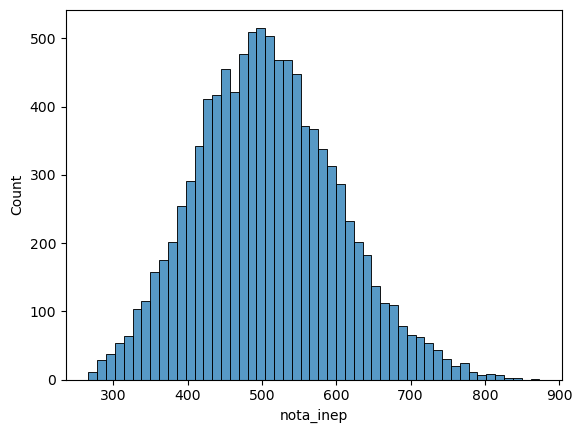

In [21]:
sns.histplot(df,x='nota_inep')

In [22]:
df.query('nota_inep > 800 & ineptheta < 0' )

UndefinedVariableError: name 'ineptheta' is not defined

In [ ]:
mt2015 = pd.read_csv('data/enem_1_2015.csv')
estranho = mt2015[mt2015['NU_INSCRICAO'] == 150005340871]

In [ ]:
pd.set_option('display.max_rows', 500)
estranho.iloc[0]

In [ ]:
df.sort_values('nota_inep')

In [ ]:
df.sort_values('ineptheta',ascending=False)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])
print(slope,intercept)
df[x].std()

In [ ]:
.71*112

In [ ]:
sns.histplot(df['acertos'],discrete=True)

In [ ]:
sns.scatterplot(df,x='inepthetas_eap',y='inepthetasse_eap')

In [ ]:
plt.errorbar(df['nota_inep'],df[x]*slope+intercept,yerr=df[xs]*slope,fmt=".",alpha=0.1)
ax = plt.gca()
ax.set_xlabel("Nota do ENEM do INEP")
ax.set_ylabel("Nota reproduzida + erro padrão")
ax.set_title("Reprodução das notas do ENEM 2019\na partir do microdados");


In [ ]:
sns.scatterplot(x=df['inepthetas_eap'],y=(df['inepthetas_ml']-df['inepthetas_eap']))

In [ ]:
resp0 = resp.iloc[0:10]
resp0

In [ ]:
%%R -i mod_inep,resp0,resp,model3pl
respvec <- rep(0,43)
fscores(mod_inep,method="EAP",full.scores=TRUE,full.scores_SE = TRUE,verbose=TRUE,response.pattern = respvec)

In [ ]:
respvec = [1]*43

In [ ]:
mirt.fscores(mod_inep,method="EAP",full_scores=True, full_scores_SE = True,verbose=True ,response_pattern = to_rdf(respvec))
